# Facebook Page Activity Analysis

TODO - In this project we are going to analyze the Facebook Page Activity.

## Downloading the Dataset

**TODO** - We will start our Analysis with downloading our Dataset.

Let's begin by downloading the data, and listing the files within the dataset.

In [1]:
# Change this
import pandas as pd
import numpy as np

In [2]:
fb_df=pd.read_csv('freeCodeCamp-facebook-page-activity.csv')

The dataset has been downloaded and extracted.

In [3]:
fb_df

,date,time,title,type,reach,clicks,reactions
0,08/18/2017,3:45 pm,The origins of t-distributions and how they ca...,Link,1768,44,21
1,08/18/2017,11:27 am,How one camper got his developer dream job,Link,6941,536,99
2,08/17/2017,7:18 pm,Trying to code when chat's open,Video,17399,2236,750
3,08/17/2017,4:55 pm,"An interaction designer explains how a ""homele...",Link,3751,167,10
4,08/17/2017,7:56 am,How to build a neural network in 30 lines of J...,Link,18248,1946,474
...,...,...,...,...,...,...,...
415,10/17/2016,4:11 pm,Only 5 hours left! Get your low-effort Hallowe...,Photo,1168,591,69
416,10/17/2016,1:08 pm,Timeline Photos,Photo,3255,745,41
417,10/17/2016,12:07 pm,Only one day left to get this low effort Hallo...,Photo,928,447,25
418,10/16/2016,1:22 pm,Freecodecamp shared your post.,Link,4913,314,51


## Data Preparation and Cleaning

**TODO** - The very first step before analyzing any Data is Data Preparation and Cleaning.


In [4]:
fb_df

,date,time,title,type,reach,clicks,reactions
0,08/18/2017,3:45 pm,The origins of t-distributions and how they ca...,Link,1768,44,21
1,08/18/2017,11:27 am,How one camper got his developer dream job,Link,6941,536,99
2,08/17/2017,7:18 pm,Trying to code when chat's open,Video,17399,2236,750
3,08/17/2017,4:55 pm,"An interaction designer explains how a ""homele...",Link,3751,167,10
4,08/17/2017,7:56 am,How to build a neural network in 30 lines of J...,Link,18248,1946,474
...,...,...,...,...,...,...,...
415,10/17/2016,4:11 pm,Only 5 hours left! Get your low-effort Hallowe...,Photo,1168,591,69
416,10/17/2016,1:08 pm,Timeline Photos,Photo,3255,745,41
417,10/17/2016,12:07 pm,Only one day left to get this low effort Hallo...,Photo,928,447,25
418,10/16/2016,1:22 pm,Freecodecamp shared your post.,Link,4913,314,51


In [5]:
fb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       420 non-null    object
 1   time       420 non-null    object
 2   title      420 non-null    object
 3   type       420 non-null    object
 4   reach      420 non-null    int64 
 5   clicks     420 non-null    int64 
 6   reactions  420 non-null    object
dtypes: int64(2), object(5)
memory usage: 23.1+ KB


In [6]:
fb_df.date=pd.to_datetime(fb_df.date)

In [7]:
fb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       420 non-null    datetime64[ns]
 1   time       420 non-null    object        
 2   title      420 non-null    object        
 3   type       420 non-null    object        
 4   reach      420 non-null    int64         
 5   clicks     420 non-null    int64         
 6   reactions  420 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 23.1+ KB


In [8]:
fb_df.type.unique()

array(['Link', 'Video', 'Photo', 'Public', 'Status'], dtype=object)

In [9]:
#Adding columns 'Year', 'Month', 'Day'& 'Weekday'
fb_df['year']=pd.DatetimeIndex(fb_df.date).year
fb_df['month']=pd.DatetimeIndex(fb_df.date).month
fb_df['day']=pd.DatetimeIndex(fb_df.date).day
fb_df['weekday']=pd.DatetimeIndex(fb_df.date).weekday

In [10]:
fb_df[fb_df.reactions=='Boost Post']

,date,time,title,type,reach,clicks,reactions,year,month,day,weekday
68,2017-07-06,4:24 pm,Freecodecamp shared Billy Le's post.,Public,688,62,Boost Post,2017,7,6,3


In [11]:
#Assigning 50K reach to post which used Boost Post Techniques
fb_df.at[68,'reactions']=50000 

In [12]:
fb_df.loc[65:70]

,date,time,title,type,reach,clicks,reactions,year,month,day,weekday
65,2017-07-07,10:52 am,An Amazon engineer wants you to invest his $50...,Link,17976,1436,272,2017,7,7,4
66,2017-07-07,8:20 am,The most common data structures you'll get ask...,Link,10910,655,223,2017,7,7,4
67,2017-07-06,10:55 pm,Sage advice from Facebook Product Designer Tan...,Link,5997,225,46,2017,7,6,3
68,2017-07-06,4:24 pm,Freecodecamp shared Billy Le's post.,Public,688,62,50000,2017,7,6,3
69,2017-07-06,8:10 am,This camper's unbeatable Tic Tac Toe taunts yo...,Link,15133,1586,267,2017,7,6,3
70,2017-07-05,2:48 pm,A massive list of free online university cours...,Link,37072,2713,1140,2017,7,5,2


In [13]:
fb_df.reactions=fb_df.reactions.astype(int)

In [14]:
fb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       420 non-null    datetime64[ns]
 1   time       420 non-null    object        
 2   title      420 non-null    object        
 3   type       420 non-null    object        
 4   reach      420 non-null    int64         
 5   clicks     420 non-null    int64         
 6   reactions  420 non-null    int32         
 7   year       420 non-null    int64         
 8   month      420 non-null    int64         
 9   day        420 non-null    int64         
 10  weekday    420 non-null    int64         
dtypes: datetime64[ns](1), int32(1), int64(6), object(3)
memory usage: 34.6+ KB


## Exploratory Analysis and Visualization

**TODO** - In this section we are going to do an Exploratory Analysis and Visualization on different parameters in the Data we got.


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [15]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [16]:
#BASIC ANALYSIS ON MONTH WISE DATA
monthly_total_df=fb_df.groupby('month')[['reach','clicks','reactions']].sum()
monthly_avg_df=fb_df.groupby('month')[['reach','clicks','reactions']].mean()

In [17]:
#BASIC ANALYSIS ON WEEKDAY WISE DATA
weekday_total_df=fb_df.groupby('weekday')[['reach','clicks','reactions']].sum()
weekday_avg_df=fb_df.groupby('weekday')[['reach','clicks','reactions']].mean()

In [18]:
monthly_total_df

,reach,clicks,reactions
month,,,
1,293982,27114,6184
2,419944,44450,8652
3,679835,46994,11759
4,589942,46775,13831
5,846366,69318,21527
6,890053,71825,18854
7,490105,34815,59737
8,377875,34701,9882
10,90940,12379,1567


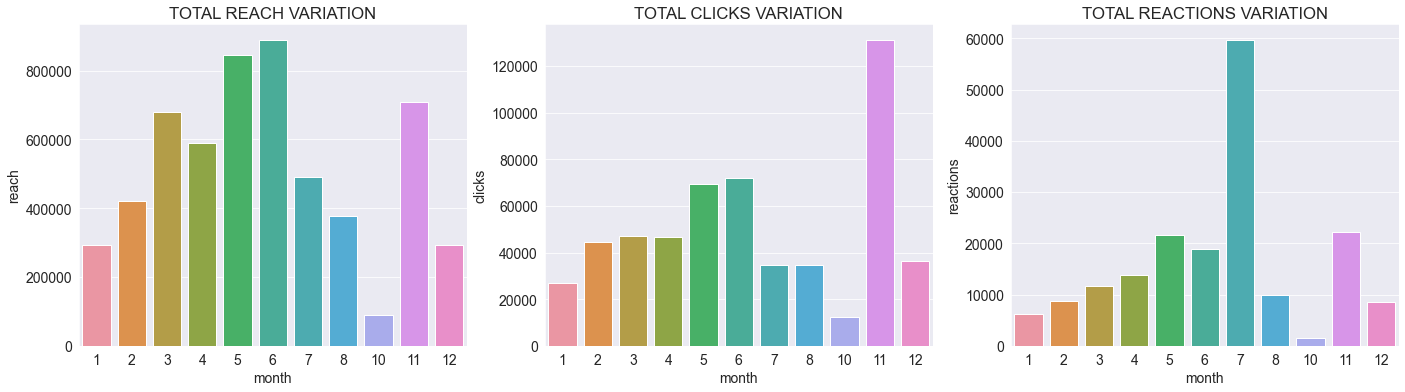

In [19]:
#MONTHLY TOTAL VARIATION GRAPH
fig, axes= plt.subplots(1,3, figsize=(20,6))
plt.tight_layout(pad=3)


axes[0].set_title("TOTAL REACH VARIATION")
sns.barplot(x=monthly_total_df.index, y=monthly_total_df.reach,ax=axes[0]);

axes[1].set_title("TOTAL CLICKS VARIATION")
sns.barplot(x=monthly_total_df.index, y=monthly_total_df.clicks,ax=axes[1]);

axes[2].set_title("TOTAL REACTIONS VARIATION")
sns.barplot(x=monthly_total_df.index, y=monthly_total_df.reactions,ax=axes[2]);

In [20]:
monthly_avg_df

,reach,clicks,reactions
month,,,
1,7945.459459,732.810811,167.135135
2,11051.157895,1169.736842,227.684211
3,13330.098039,921.450980,230.568627
4,14748.550000,1169.375000,345.775000
5,14848.526316,1216.105263,377.666667
6,14127.825397,1140.079365,299.269841
7,10427.765957,740.744681,1271.000000
8,13995.370370,1285.222222,366.000000
10,6995.384615,952.230769,120.538462


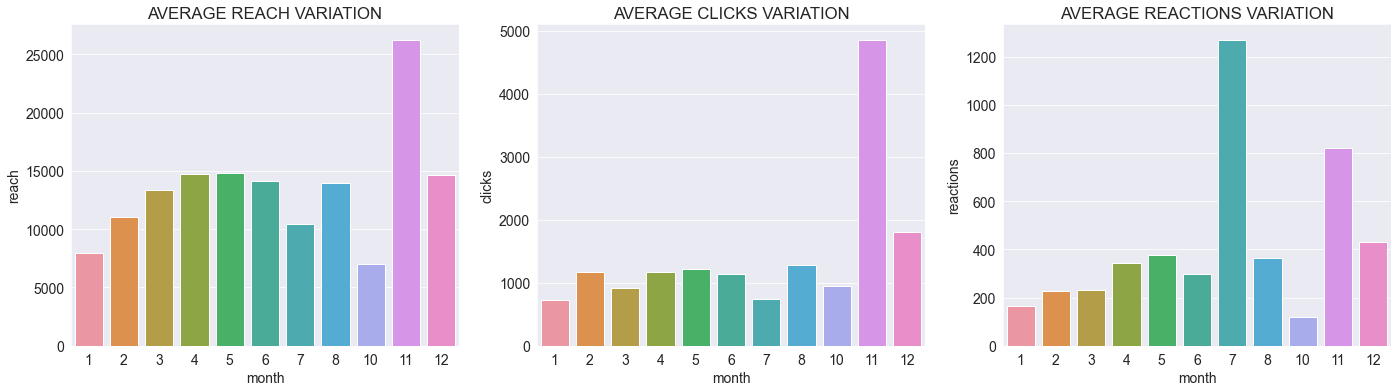

In [21]:
#MONTHLY AVERAGE VARIATION GRAPH
fig, axes= plt.subplots(1,3, figsize=(20,6))
plt.tight_layout(pad=3)


axes[0].set_title("AVERAGE REACH VARIATION")
sns.barplot(x=monthly_avg_df.index, y=monthly_avg_df.reach,ax=axes[0]);

axes[1].set_title("AVERAGE CLICKS VARIATION")
sns.barplot(x=monthly_avg_df.index, y=monthly_avg_df.clicks,ax=axes[1]);

axes[2].set_title("AVERAGE REACTIONS VARIATION")
sns.barplot(x=monthly_avg_df.index, y=monthly_avg_df.reactions,ax=axes[2]);

In [22]:
weekday_total_df

,reach,clicks,reactions
weekday,,,
0,992017,87323,20791
1,952339,94884,21062
2,1219500,154126,33205
3,836110,73304,68859
4,620476,58120,17595
5,405351,34337,8565
6,654340,53826,12724


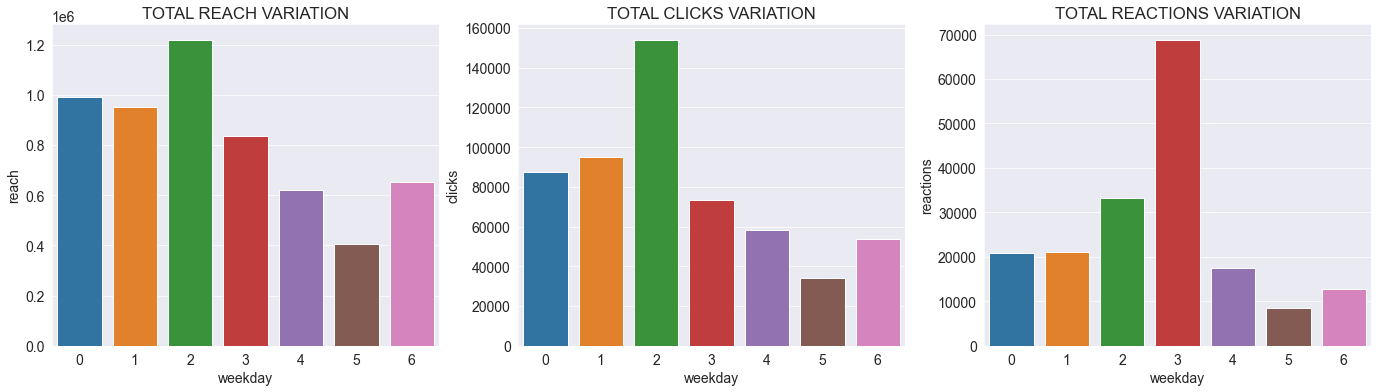

In [23]:
#DAYWISE TOTAL VARIATION GRAPH
fig, axes= plt.subplots(1,3, figsize=(20,6))
plt.tight_layout(pad=3)


axes[0].set_title("TOTAL REACH VARIATION")
sns.barplot(x=weekday_total_df.index, y=weekday_total_df.reach,ax=axes[0]);

axes[1].set_title("TOTAL CLICKS VARIATION")
sns.barplot(x=weekday_total_df.index, y=weekday_total_df.clicks,ax=axes[1]);

axes[2].set_title("TOTAL REACTIONS VARIATION")
sns.barplot(x=weekday_total_df.index, y=weekday_total_df.reactions,ax=axes[2]);

In [24]:
weekday_avg_df

,reach,clicks,reactions
weekday,,,
0,11952.012048,1052.084337,250.493976
1,12368.038961,1232.259740,273.532468
2,19054.687500,2408.218750,518.828125
3,12479.253731,1094.089552,1027.746269
4,12662.775510,1186.122449,359.081633
5,11259.750000,953.805556,237.916667
6,14871.363636,1223.318182,289.181818


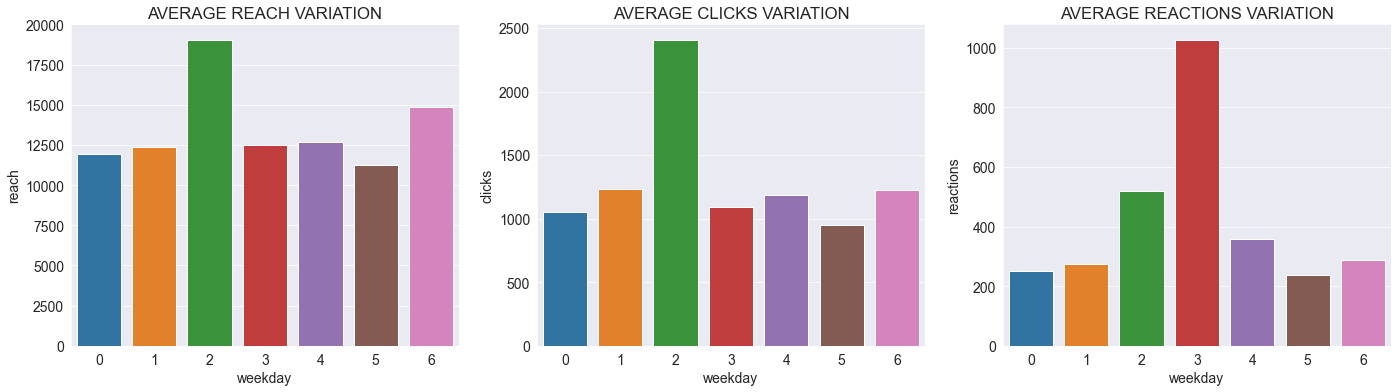

In [25]:
#DAYWISE TOTAL VARIATION GRAPH
fig, axes= plt.subplots(1,3, figsize=(20,6))
plt.tight_layout(pad=3)


axes[0].set_title("AVERAGE REACH VARIATION")
sns.barplot(x=weekday_avg_df.index, y=weekday_avg_df.reach,ax=axes[0]);

axes[1].set_title("AVERAGE CLICKS VARIATION")
sns.barplot(x=weekday_avg_df.index, y=weekday_avg_df.clicks,ax=axes[1]);

axes[2].set_title("AVERAGE REACTIONS VARIATION")
sns.barplot(x=weekday_avg_df.index, y=weekday_avg_df.reactions,ax=axes[2]);

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

## Asking and Answering Questions

In this section we are going to answer some of the questions that arises in my Mind.


#### Q1: Which type of Post would Users like to see more often?

In [26]:
#BASIC ANALYSIS ON TYPE OF POSTS
type_df=fb_df.groupby('type')[['reach','clicks','reactions']].max()
type_df

,reach,clicks,reactions
type,,,
Link,63598,9335,2002
Photo,66690,7792,3593
Public,688,62,50000
Status,6431,389,106
Video,408191,89329,15226


As it is clear from the above table that'Video' Posts are the most liked post type among the users, because it has most numbers of 'Reach', 'Clicks' as well as 'Reactions'.

#### Q2: At what time duration people use Facebook often? Is it in 1st Hour (before 12PM) or in 2nd Hour(after 12PM)?

In [27]:
am=0
pm=0
for t in fb_df.time:
    if t[-2:]=="am":
        am+=1
    else:
        pm+=1
print("Total AM = {} , TOTAL PM = {} ".format(am,pm))
if am>pm:
    print("People use Facebook more in 1st Hour(Before 12PM)")
else:
    print("People use Facebook more in 2nd Hour(After 12PM)")

Total AM = 177 , TOTAL PM = 243 
People use Facebook more in 2nd Hour(After 12PM)


#### Q3: If some product selling company wants to target mass audience then which type of ad will be the best?

In [28]:
reach_df=fb_df.groupby('type')[['reach']].max()
reach_df

,reach
type,
Link,63598
Photo,66690
Public,688
Status,6431
Video,408191


To influence maximum number of audience one can use a 'Video' Ad because it got the maximum reach among all types of Posts.

#### Q4: What is the Minimum and Maximum number of 'Reach', 'Clicks' and 'Reactions' any post has got?

In [29]:
#RANGE OF 'REACH','CLICKS','REACTIONS' 

#MAXIMUM
max_reach=fb_df.reach.max()
max_clicks=fb_df.clicks.max()
max_react=fb_df.reactions.max()

#MINIMUM
min_reach=fb_df.reach.min()
min_clicks=fb_df.clicks.min()
min_react=fb_df.reactions.min()

print("MINIMUM REACH IS {} & MAXIMUM REACH IS {}".format(min_reach,max_reach))
print("MINIMUM CLICKS IS {} & MAXIMUM CLICKS IS {}".format(min_clicks,max_clicks))
print("MINIMUM REACTIONS IS {} & MAXIMUM REACTIONS IS {}".format(min_react,max_react))

MINIMUM REACH IS 688 & MAXIMUM REACH IS 408191
MINIMUM CLICKS IS 42 & MAXIMUM CLICKS IS 89329
MINIMUM REACTIONS IS 10 & MAXIMUM REACTIONS IS 50000


## Inferences and Conclusion

**TODO** - In this analysis we analyzed about the Facebook Page and many challanges we faced and learnt how to overcome those challanges.